In [1]:
import pandas as pd

df = pd.read_csv('../Data/ultimate/Ultimate_AAPL_filtered.csv')
df['test'] = (df['Close_price-today'] - df['Close_price-tmr'])/df['Close_price-tmr']


In [9]:
df.head(5)


,post_date,comment_num,retweet_num,like_num,follower_count,compound_score,Close_price-today,Close_price-tmr,Close_price-2days,test
0,2015-01-04 21:04:38,0,0,0,1161,0.5562,26.5625,26.565001,26.9375,-0.000094
1,2015-01-04 21:07:58,0,0,1,218,0.2500,26.5625,26.565001,26.9375,-0.000094
2,2015-01-04 21:08:09,0,0,1,1099,0.0000,26.5625,26.565001,26.9375,-0.000094
3,2015-01-04 21:10:46,0,0,0,1070,-0.1027,26.5625,26.565001,26.9375,-0.000094
4,2015-01-04 21:13:34,1,3,6,259879,0.0000,26.5625,26.565001,26.9375,-0.000094


In [6]:
print(df['test'].mean())
print(df['test'].max())
print(df['test'].std())

-0.0014044489294244018
0.11062659510157972
0.01641400984521232


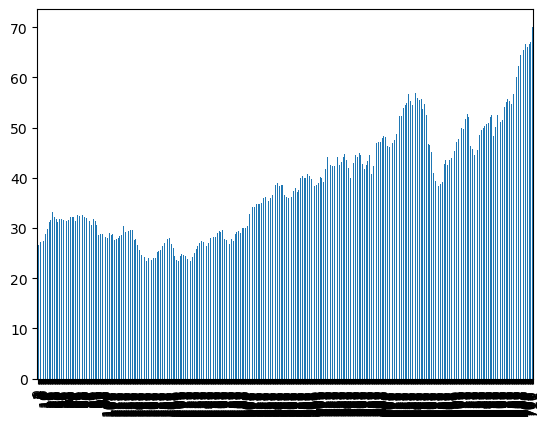

In [8]:
import matplotlib.pyplot as plt
# get all the unique values of the column 'Close_price-today' and plot them
close_prices = pd.Series(df['Close_price-today'].unique())
close_prices.plot(kind='bar')

plt.show()


In [14]:
df = pd.read_csv('../Data/new/AAPL_Finance.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date in ascending order
df = df.sort_values('Date', ascending=True)

# Create a new column 'Delta' to store the price delta
df['Delta'] = df['Close'].shift(-1) - df['Close']

# Drop the last row since there is no next day's price for it
df = df[:-1]

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,UnixTime_close,Delta
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565695,212818400,1420232400,-0.770000
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000,1420491600,0.002501
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400,1420578000,0.372499
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600,1420664400,1.035000
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000,1420750800,0.030001


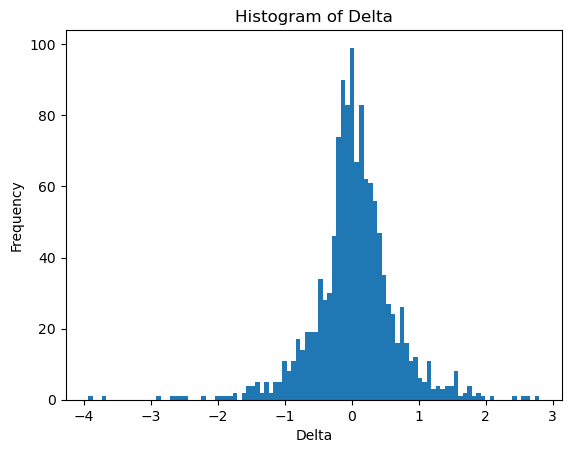

In [20]:
plt.hist(df['Delta'], bins=100)
plt.title('Histogram of Delta')
plt.xlabel('Delta')
plt.ylabel('Frequency')
plt.show()


[-3.932499 -3.685001 -2.864998 -2.670002 -2.627499 -2.575    -2.455002
 -2.220001 -2.032501 -1.9175  ]


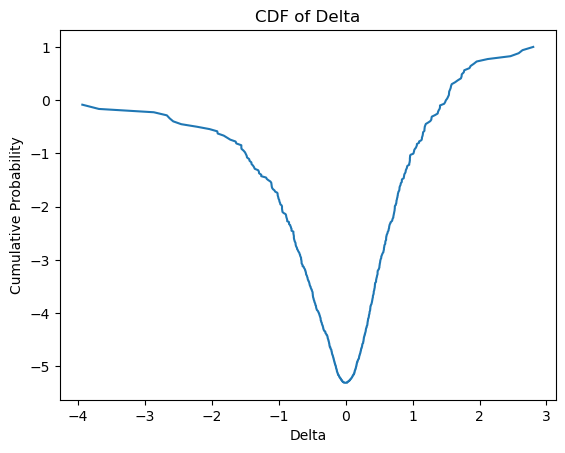

In [27]:
import numpy as np

delta = df['Delta']

delta_sorted = np.sort(delta)

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(delta_sorted) / np.sum(delta_sorted)

# Create the CDF plot
plt.plot(delta_sorted, cdf)  

# Set plot title and labels
plt.title('CDF of Delta')
plt.xlabel('Delta')
plt.ylabel('Cumulative Probability')

# Show the plot
plt.show()